<a href="https://colab.research.google.com/github/afhabibieee/Statistics-with-Python/blob/main/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parameter estimation by optimization

**Optimal parameters**

In [ ]:
# import datasets mlb_nohitters
mlb_nohitters = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/mlb_nohitters.csv')
mlb_nohitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             294 non-null    int64 
 1   game_number      294 non-null    int64 
 2   winning_team     228 non-null    object
 3   losing_team      228 non-null    object
 4   winning_pitcher  228 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.6+ KB


In [ ]:
# subsetting game number
nohitter_game = mlb_nohitters['game_number']
nohitter_game[:5]

0     140
1    1035
2    1046
3    1177
4    1179
Name: game_number, dtype: int64

In [ ]:
# compute nohitter times between nohitter game
nohitter_times = []

for i in range(len(nohitter_game)-1):
  if nohitter_times == []:
    time = nohitter_game[i] - 1 - 0
  else:
    time = nohitter_game[i] - 1 - nohitter_game[i-1]
  
  nohitter_times.append(time)

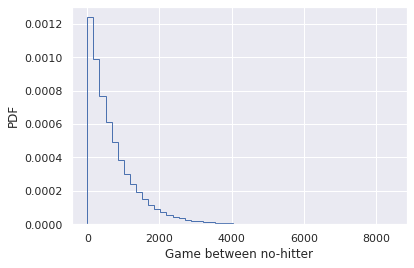

<Figure size 432x288 with 0 Axes>

In [ ]:
# seed random number generator
np.random.seed(42)

# compute mean hohitter time
tau = np.mean(nohitter_times)

# draw out an exponential distribution with parameter tau 
inter_nohitter_time = np.random.exponential(tau, size=100000)

# plot pdf
sns.set()
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Game between no-hitter')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

In [ ]:
# plot with CDFs

def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

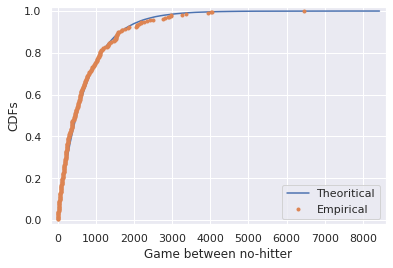

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set()

# theoritical
x_theor, y_theor = ecdf(inter_nohitter_time)
_ = plt.plot(x_theor, y_theor)

# empirical
x, y = ecdf(nohitter_times)
_ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.xlabel('Game between no-hitter')
_ = plt.ylabel('CDFs')
plt.margins(0.02)
plt.legend(('Theoritical', 'Empirical'), loc='lower right')
plt.show()
plt.clf()

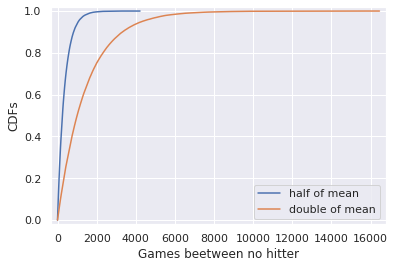

<Figure size 432x288 with 0 Axes>

In [ ]:
# see how the comparison between the previous optimal and the non-optimal parameters that will be tested
np.random.seed(42)

# parameter lainnya
sample_half = np.random.exponential(tau/2, size=100000)
sample_double = np.random.exponential(tau*2, size=100000)

x_half, y_half = ecdf(sample_half)
x_double, y_double = ecdf(sample_double)

# plot CDFs
sns.set()
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
plt.margins(0.02)
_ = plt.xlabel('Games beetween no hitter')
_ = plt.ylabel('CDFs')
plt.legend(('half of mean', 'double of mean'), loc='lower right')
plt.show()
plt.clf()

---
**Linear regression by least squares**

Selain dengan menghitung korelasi antar fitur pada data dengan Pearson correlation coefficient, juga perlu mengetahui korelasi lebih lanjut dari antar fitur, seperti **linear function**. pada fungsi in terdapat dua parameter penting
*   slope
*   intercept

how figure out which slope and intercept best describe data? **least suqres**

**Least squares** adalah process untuk menemukan parameter mana yang jumlah dari kuadrat residual adalah minimal, yang nanti akan didefinisikan dalam bentuk line/garis

In [ ]:
# explore korelasi dua fitur (percent of vote for Obama dan total vote)
# dari dataset swing state (PA, OH, FL) tahun 2008

swing_states = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/2008_swing_states.csv')

# subsetting Obama's vote (percent)
obama_votes = swing_states['dem_share']

#subsetting total votes
total_votes = swing_states['total_votes']

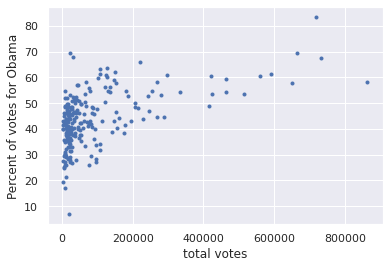

<Figure size 432x288 with 0 Axes>

In [ ]:
# lihat sebaran data
_ = plt.plot(total_votes, obama_votes, marker='.', linestyle='none')
_ = plt.xlabel('total votes')
_ = plt.ylabel('Percent of votes for Obama')
plt.show()
plt.clf()

kalau dilihat langsung kita bisa menyimpulkan kalau dua fitur tersebut berkorelasi positif.

In [ ]:
# mendapatkan nilai slope dan intercept dari dua fitur tadi

# parameter 1 pada argument ketiga adalah degree value dari polinomial karena linear function
slope, intercept = np.polyfit(total_votes, obama_votes, 1)

print(slope)
print(intercept)

4.0370717009465616e-05
40.11391196864175


nah, dari slope kita bisa lihat bahwa ada 4% atau lebih suara untuk obama untuk setiap 100.000 tambahan pemilik suara pada county(PA, OH, FL)

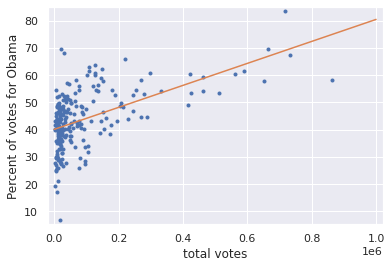

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot linear legression
# check max value of total votes : 863486 --> 1000000

# make theoritical line plot
x = np.array([0, 1000000])
y = slope * x + intercept

sns.set()
_ = plt.plot(total_votes, obama_votes, marker='.', linestyle='none')
# overlay with line plot
_ = plt.plot(x, y)
plt.margins(0.02)
_ = plt.xlabel('total votes')
_ = plt.ylabel('Percent of votes for Obama')
plt.show()
plt.clf()

The function np.polyfit() that I used to get my regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). https://en.wikipedia.org/wiki/Residual_sum_of_squares

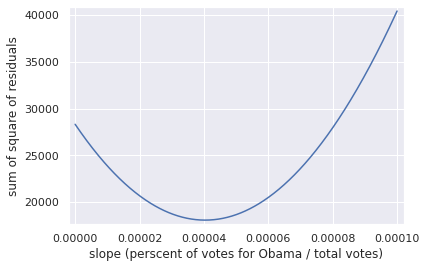

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the function that is being optimized, the RSS, versus the slope parameter a

# specify slope to consider
a_slope = np.linspace(0, 0.0001, num=500)

# initiallize sum of square of residuals
rss = np.empty_like(a_slope)

# computer sum of square of residuals for each value of a_slope
for i, a in enumerate(a_slope):
  rss[i] = np.sum((obama_votes - a * total_votes - intercept)**2)

# plot a_slope vs rss
_ = plt.plot(a_slope, rss, linestyle='-')
_ = plt.xlabel('slope (perscent of votes for Obama / total votes)')
_ = plt.ylabel('sum of square of residuals')
plt.margins(0.02)
plt.show()
plt.clf()

bisa dilihat dari figure di atas nilai minimumnya untuk parameter slope yang optimal

---

contoh 2 pada dataset female literacy dan fertility. korelasi illeteracy dengan fertility

In [ ]:
# import dataset
female_lit_fer = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/female_literacy_fertility.csv')

# subsetting fiture literacy dan fertility
literacy = female_lit_fer['female literacy']
fertility = female_lit_fer['fertility']

In [ ]:
# transform data literacy menjadi illeteracy
illiteracy = (literacy - 100) * (-1)    # dikurangi 100 karena dalam bentuk persent
illiteracy

0       9.5
1      49.2
2       1.0
3      11.2
4       9.8
       ... 
157    20.5
158     1.5
159    16.7
160     2.0
161     0.9
Name: female literacy, Length: 162, dtype: float64

slope :  0.04979854809063423
intercept :  1.8880506106365567


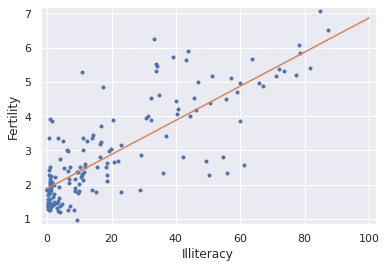

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the illiteracy rate vs fertility

_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('Illiteracy')
_ = plt.ylabel('Fertility')

# perform linear regression usin np.polyfit
a, b = np.polyfit(illiteracy, fertility, 1)

print("slope : ", a)
print("intercept : ", b)

# make theoritical line to plot
x = np.array([0, 100])   # hingga minimal nilai terbesar dari x axes : 87.4 --> 100
y = a * x + b

# plot regression line
_ = plt.plot(x, y, linestyle='-')

plt.margins(0.02)
plt.show()
plt.clf()

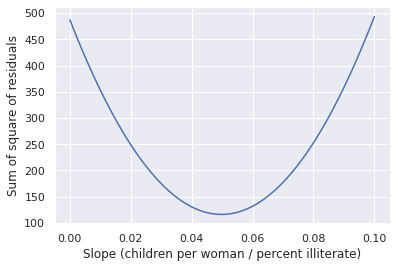

<Figure size 432x288 with 0 Axes>

In [ ]:
# optimization for parameter slope vs rss

# specify slope to consider
a_values = np.linspace(0, 0.1, num=200)

# initiallize rss
rss = np.empty_like(a_values)

# compute rss for each value of slope
for i, a in enumerate(a_values):
  rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# plot slope x rss
_ = plt.plot(a_values, rss, linestyle='-')
_ = plt.xlabel('Slope (children per woman / percent illiterate)')
_ = plt.ylabel('Sum of square of residuals')

plt.show()
plt.clf()

lihat pada figure di atas kita bisa mendapatkan parameter yang optimal untuk slope

---

In [ ]:
# Linear regression on appropriate Anscombe data

anscombe = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/anscombe.csv')
anscombe.head()

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84


In [ ]:
anscombe = anscombe.drop([0])
anscombe.head()

,0,0.1,1,1.1,2,2.1,3,3.1
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [ ]:
# initialize set of anscombe
anscombe_x = []
anscombe_y = []

# subsetting x and y respectively
for i, j in enumerate(anscombe):
  if i % 2 == 0:
    x = []
    for value in anscombe[j]:
      # string to float
      x.append(float(value))

    anscombe_x.append(np.array(x))  
  else:
    y = []
    for value in anscombe[j]:
      # string to float
      y.append(float(value))
    
    anscombe_y.append(np.array(y))

In [ ]:
# plot tiap anscombe
def show_anscombe(x, y):
  ''' Plot sebaran data dan regression'''
  
  _ = plt.plot(x, y, marker='.', linestyle='none')
  _ = plt.xlabel('x')
  _ = plt.ylabel('y')

  # slope and intercept
  a, b = np.polyfit(x, y, 1)

  # compute theoritical line
  x_line = np.array([0, 15])
  y_line = a * x_line + b

  # plot the line
  _ = plt.plot(x_line, y_line)
  
  plt.margins(.02)
  plt.show()
  plt.clf()

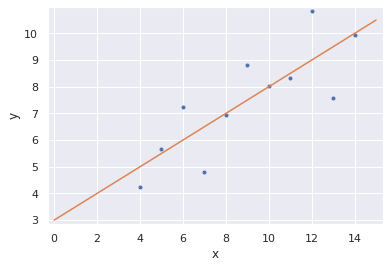

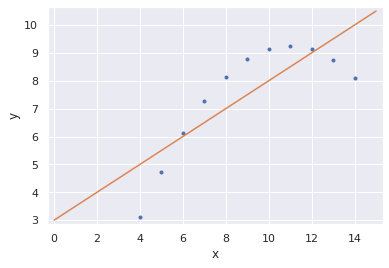

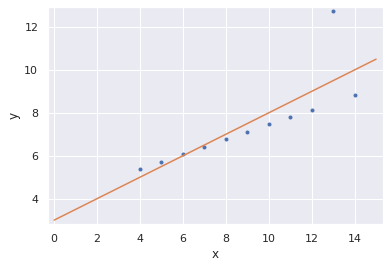

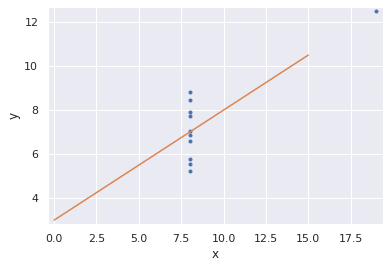

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot
for i in range(4):
  show_anscombe(anscombe_x[i], anscombe_y[i])

kesimpuan pada tiap gambar berdasarkan urutan gambar
1.   sudah sesuai dengan model linear regression
2.   jelas bukan linear, jadi butuh model lain
3.   setelah melakukan EDA, perlu untuk mengetahui penyebab outlier. karena outlier menyebabkan perubahan pada slope dan intercept
4.   mungkin memiliki linear relationship antara x dan y tapi perlu lebih banyak data lagi pada x untuk memastikannya

In [ ]:
# compute linear regression to all anscombe

for x, y in zip(anscombe_x, anscombe_y):
  a, b = np.polyfit(x, y, 1)
  print('slope : ' + str(a)+ ' and intercept : ' + str(b))

slope : 0.5000909090909094 and intercept : 3.000090909090908
slope : 0.5000000000000003 and intercept : 3.0009090909090905
slope : 0.49972727272727313 and intercept : 3.002454545454545
slope : 0.4999090909090908 and intercept : 3.0017272727272735


tiap-tiap slope dan intercept memiliki nilai yang hampir dikatakan sama

---

# Bootstrap confidence intervals

Biasanya saat eksperimen kita jarang tertarik atau puas dengan hasil satu kali experiment / satu kali perolehan data. jadinya kita membutuhkan percobaan experiment lebih banyak lagi. tapi masalahnya ketika data yang kita gunakan sudah terpakai pada eksperimen pertama, jadinya kita perlu melakukan manipulasi untuk mendapatkan data yang kumpulan nilai yang kolektif dari data pertama, dan menghasilkan kesimpulan statistik yang lebih banyak. Teknik ini dikenal dengan Bootstrapping.

**Bootstrapping** ~ The use resampled data to perform statistical inference

**Bootstrap sample** ~ A redampled array of the data

**Bootstrap replicate** ~ A statistic compute from a resampled array or a value of the summary statistic computed from the bootstrap sample

In [ ]:
# contoh bootstrap sample dari data pengukuran kecepatan cahaya

# import dataset speed of light
michelson_speed_of_light = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/michelson_speed_of_light.csv')
speed_of_light = michelson_speed_of_light['velocity of light in air (km/s)']

# resampling
bs_sample = np.random.choice(speed_of_light, size=len(speed_of_light))

# lihat 5 data pertama
print('Data empiris,', 'Bootstrap samples')
count = 0
for i, j in zip(speed_of_light, bs_sample):
  if count < 5:
    print(i, j)
  count += 1

Data empiris, Bootstrap samples
299850 299920
299740 299880
299900 299870
300070 299880
299930 299880


In [ ]:
# bisa pilih summary statistics yang inginkan
print(np.mean(bs_sample))
print(np.std(bs_sample))
print(np.median(bs_sample))

299853.5
79.33946054769972
299850.0


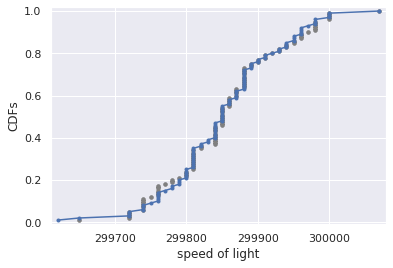

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing bootstrap samples

for i in range(50):
  # generate bootstrap sample
  bs_samples = np.random.choice(speed_of_light, size=len(speed_of_light))

  # compute and plot cdf from bootstrap samples
  bs_x, bs_y = ecdf(bs_sample)
  _ = plt.plot(bs_x, bs_y, marker='.', linestyle='none', alpha=0.05, color='gray')

# compute and plot ecdf
x, y = ecdf(speed_of_light)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('speed of light')
_ = plt.ylabel('CDFs')
plt.margins(0.02)
plt.show()
plt.clf()

---
sheffield weather station dataset

In [ ]:
# karena datanya error saat di parsing jadinya bikin gini aja sampai nemu solusi
rainfall = [875.5, 648.2, 788.1, 940.3, 491.1, 743.5, 730.1, 686.5, 878.8, 
            865.6, 654.9, 831.5, 798.1, 681.8, 743.8, 689.1, 752.1, 837.2, 
            710.6, 749.2, 967.1, 701.2, 619. , 747.6, 803.4, 645.6, 804.1,
            787.4, 646.8, 997.1, 774. , 734.5, 835. , 840.7, 659.6, 828.3,
            909.7, 856.9, 578.3, 904.2, 883.9, 740.1, 773.9, 741.4, 866.8,
            871.1, 712.5, 919.2, 927.9, 809.4, 633.8, 626.8, 871.3, 774.3,
            898.8, 789.6, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9, 683.9,
            985.7, 771.1, 736.6, 713.2, 774.5, 937.7, 694.5, 598.2, 983.8,
            700.2, 901.3, 733.5, 964.4, 609.3, 1035.2, 718. , 688.6, 736.8,
            643.3, 1038.5, 969. , 802.7, 876.6, 944.7, 786.6, 770.4, 808.6,
            761.3, 774.2, 559.3, 674.2, 883.6, 823.9, 960.4, 877.8, 940.6,
            831.8, 906.2, 866.5, 674.1, 998.1, 789.3, 915. , 737.1, 763. , 
            666.7, 824.5, 913.8, 905.1, 667.8, 747.4, 784.7, 925.4, 880.2,
            1086.9, 764.4, 1050.1, 595.2, 855.2, 726.9, 785.2, 948.8, 970.6, 
            896. , 618.4, 572.4, 1146.4, 728.2, 864.2, 793.]
rainfall = np.array(rainfall)

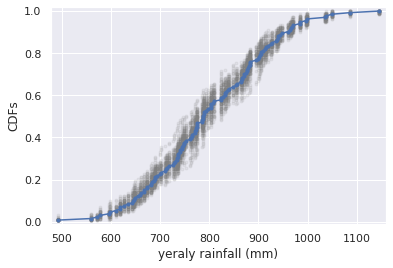

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing bootstrap sample

for i in range(50):
  # generate bootstrap samples
  bs_samples = np.random.choice(rainfall, size=len(rainfall))

  # compute and plot CDF from bootstrap samples
  bs_x, bs_y = ecdf(bs_samples)
  _ = plt.plot(bs_x, bs_y, marker='.', linestyle='none', color='gray', alpha=0.1)

# compute and plot ECDF
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('yeraly rainfall (mm)')
_ = plt.ylabel('CDFs')
plt.margins(.02)
plt.show()
plt.clf()

---
karena kalau lihat pada cell sebelumnya itukan melakukan eksperimen ulang berulang dengan melakukan bootstrap replicate, maka untuk summary of statistics lainnya kenapa tidak dibuat function yang generate bootstrap replicate. selain itu juga bisa menentukan **bootstrap confidance interval** dari distribusi probabilitas dari bootstrap replicate

In [ ]:
# bootstrap replicate function

def bootstrap_repilcate_1d(data, func):
  ''' Generate bootstrap replicate of 1D data '''
  bs_sample = np.random.choice(data, size=len(data))

  return func(bs_sample)

In [ ]:
# try compute the mean of bs speed of light
print(bootstrap_repilcate_1d(speed_of_light, np.mean))
print(bootstrap_repilcate_1d(speed_of_light, np.mean))
print(bootstrap_repilcate_1d(speed_of_light, np.mean))

299838.9
299849.7
299866.6


I have vary value of the mean, cool!

In [ ]:
# many bootstrap replicate

def draw_bs_replicates(data, func, size=1):
  bs_replicates = np.empty(size)
  for i in range(size):
    bs_replicates[i] = bootstrap_repilcate_1d(data, func)
  
  return bs_replicates

In [ ]:
# many bootstrap replicate dari speed of light

bs_replicates = draw_bs_replicates(speed_of_light, np.mean, size=10000)

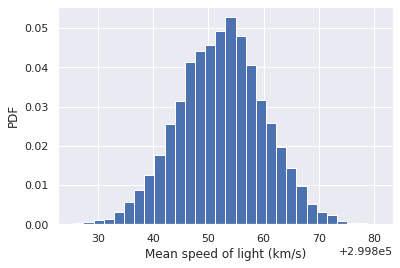

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting a histogram of botstrap duplicates

_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('Mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

Nah dari grafik diatas, area dibawah PDF itukan memberikan probability. di part sebelumnya bisa diliat lagi, kalau lupa wkwkwk. nah karena telah menghitung perkiraan PDF dari mean speed of light yang diharapkan jika melakukan pengukuran lagi.

Trus jika kita melakukan experimen lagi dan lagi, nah cara ini bagus untuk menimpulkan hasil tanpa mengurutkan data ke dalam graphical method seperti histogram. Dan untuk melakukannya, misalnya kita akan menghitung 95% confidence interval dari mean.

**Confidence interval of statistics** ~ if we repeat measurement over and over again, p% of the obseved value would lie within the p% convidence interval.

misalnya pada case diatas, jika kita mengulangi 100 pengukuran kecepatan cahaya berulang kali, 95% rata-rata sampel akan berada dalam interval kepercayaan 95%.

artinya, kita melakukan bootstrap replicate (mengulangi experiment berulangkali). jadi bisa menggunakan persentil, dengan menghitung persentil ke 2.5 dan 97.5 untuk mendapatkan 95% confidence interval, nah ini bisa dilihat di histogram

Dengan melakukan replika bootstrap, kami hanya "mengulangi" eksperimen tersebut berulang kali. Jadi, kami hanya menggunakan persentil np titik untuk menghitung persentil 2 poin ke 5 dan 97 poin ke 5 untuk mendapatkan interval kepercayaan 95%. Ini memang sepadan dengan apa yang kita lihat di histogram

In [ ]:
# 95% confidence interval

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299836.9, 299867.6])

lihat confidence interval di x axes dari hasil persentil

---

95% confidence interval = [779.58518797 820.06261278] mm


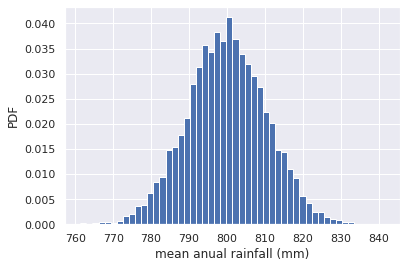

<Figure size 432x288 with 0 Axes>

In [ ]:
# compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station

bs_replicates_rainfall = draw_bs_replicates(rainfall, np.mean, size=10000)

# 95% confidence interval
conf_int = np.percentile(bs_replicates_rainfall, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'mm')

_ = plt.hist(bs_replicates_rainfall, bins=50, density=True)
_ = plt.xlabel('mean anual rainfall (mm)')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

Nah sebenarnya ini secara visualpun terlihat terdistribusi normal. Tapi emang faktanya, dapat ditunjukkan secara teoritis bahwa dalam kondisi tidak terlalu restriktif, nilai mean akan selalu terdistribusi secara normal (Ini tidak berlaku secara umum, hanya untuk mean dan beberapa statistik lainnya aja).

Dan yang menarik lainnya, Standard Deviasi dari distribusi diatas itu sama dengan **SEM (standard error of the mean)** dari data empiris (rainfall). Rujukan: https://en.wikipedia.org/wiki/Standard_error

In [ ]:
# SEM vs Std of sampling distribution of mean

sem = np.std(rainfall) / np.sqrt(len(rainfall))

bs_std = np.std(bs_replicates_rainfall)

print(sem, bs_std)

10.510549150506188 10.407872280183724


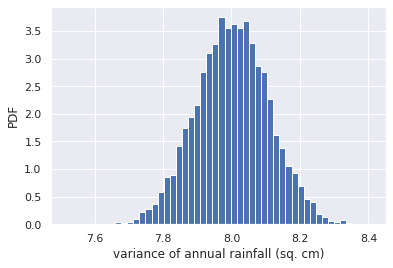

95% confidence interval = [7.79603496 8.21099492] cm


<Figure size 432x288 with 0 Axes>

In [ ]:
# Bootstrap replicates of other statistics : variance

# Generate 10,000 bootstrap replicates of the variance
bs_rep_rainfall_var = draw_bs_replicates(rainfall, np.mean, size=10000)

# Put the variance in units of square centimeters
x = bs_rep_rainfall_var / 100

# plot PDF
_ = plt.hist(x, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(x, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'cm')

95% confidence interval = [626.14351536 816.20042662] games


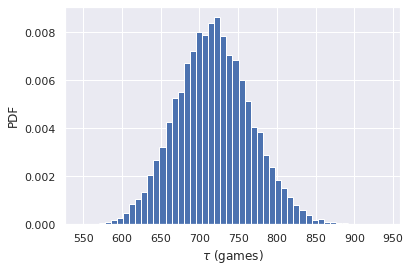

<Figure size 432x288 with 0 Axes>

In [ ]:
# oke coba cari optimal parameter dari Confidence interval on the rate of no-hitters
# nohitter times udah ada diatas tinggal panggil

# Draw bootstrap replicates of the mean no-hitter time (equal to tau)
bs_replicates = draw_bs_replicates(nohitter_times, np.mean, size=10000)

# hitung the 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

---
**Pair Bootstrap for Linear Regression** ~ Resample data in pairs

study case:
misalnya dari pemilihan suara yang didapat obama dan total suara keseluruhan tiap tiap county dilakukan pemilihan lagi, atau tambahan. jadi bayangkan perubahan intercept dan slope bakal seperti apa. jadi bagaimana kita estimasi perubahan tersebut, dan bagaimana dengan confidence interval optimal parameter untuk kedua parameter tersebut.

dan untuk resampling data lagi karena tidak lagi 1 dimensi, maka perlu melakukan manipulasi resampling indeks yang nantinya di susun ke pada dua fitur total votes dan votes share for obama

In [ ]:
def draw_bs_pair_linreg(x, y, size=1):
  """Perform pairs bootstrap for linear regression."""

  # set up array indices to sample from
  inds = np.arange(len(x))

  # initialize replicates
  bs_slope_reps = np.empty(size)
  bs_intercept_reps = np.empty(size)

  # generate replicates
  for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x = x[bs_inds]
    bs_y = y[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

  return bs_slope_reps, bs_intercept_reps

[3.25295237e-05 4.98396768e-05]


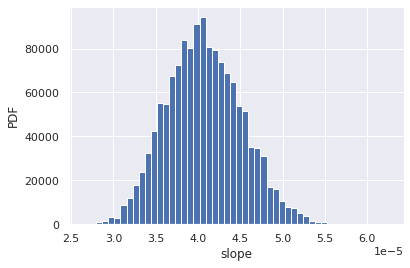

<Figure size 432x288 with 0 Axes>

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pair_linreg(total_votes,
                                                       obama_votes,
                                                       size=5000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()
plt.clf()

Plotting bootstrap regressions

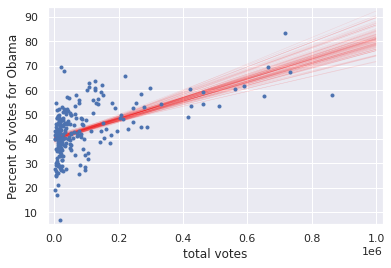

<Figure size 432x288 with 0 Axes>

In [ ]:
# Generate array of x-values for bootstrap lines, endpoint > max(data_x) ==> 1,000,000
x = np.array([0, 1000000])

# plot the bootstrap lines
for i in range(100):
  y = bs_slope_reps[i] * x + bs_intercept_reps[i]
  _ = plt.plot(x, y, alpha=0.1, color='red', linewidth=0.5)

# plot the actual data
_ = plt.plot(total_votes, obama_votes, marker='.', linestyle='none')
_ = plt.xlabel('total votes')
_ = plt.ylabel('Percent of votes for Obama')
plt.margins(.02)
plt.show()
plt.clf()

# Introduction to hypothesis testing

**Hypothesis test** ~ Aseesment of how reasonable the observed data are assuming a hypothesis is true


e.g when we builed linear regression, we assumed a linear model for how the data generated and then estimated the parameter that are difined by that model.

how do we asess how reasonable our observed data are actually descrived the model? this the realm of hypothesis testing.

misalnya Ohio and Pennsylvania negara bagian yang mirip. negara bagian yang berdekatan, dan memiliki liberal urban counties dan juga rural conservative counties. nah misalnya saya berhipotesis kalau county-level voting dari dua negara bagian ini memiliki distribusi probabilitas yang identik. lalu saya menilai seberapa masuk akal data yang diamati dengan mengasumsikan hipotesis benar.

nah hipotesis yang saya uji ini dinamakan **The null hypothesis**.

In [ ]:
# vote for obama in PA (%)
obama_votes_pa = obama_votes[swing_states['state']=='PA']

#vote for obama in OH (%)
obama_votes_oh = obama_votes[swing_states['state']=='OH']

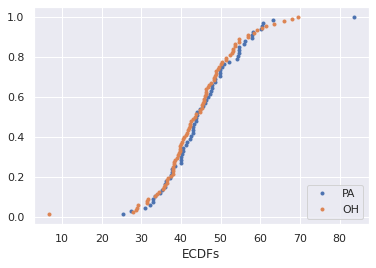

<Figure size 432x288 with 0 Axes>

In [ ]:
# lihat dengan plot ECDFs

x_pa, y_pa = ecdf(obama_votes_pa)
x_oh, y_oh = ecdf(obama_votes_oh)

_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.xlabel('ECDFs')
_ = plt.legend(('PA', 'OH'), loc='lower right')
plt.show()
plt.clf()

kalau dilihat di PA sedikit lebih banyak dukung Obama dari pada di OH

In [ ]:
# coba lihat real comparasion of summary statistic both of them

# pa
mean_pa = np.mean(obama_votes_pa)
median_pa = np.median(obama_votes_pa)
std_pa = np.std(obama_votes_pa)

# oh
mean_oh = np.mean(obama_votes_oh)
median_oh = np.median(obama_votes_oh)
std_oh = np.std(obama_votes_oh)

# pa - oh diference
mean_diff = mean_pa - mean_oh
median_diff = median_pa - median_oh
std_diff = std_pa - std_oh

# print
print('pa: ', mean_pa, median_pa, std_pa)
print('oh :', mean_oh, median_oh, std_oh)
print('diference (pa-oh) : ', mean_diff, median_diff, std_diff)

pa:  45.476417910447765 44.03 9.729595825615187
oh : 44.31818181818181 43.675 9.83931267756758
diference (pa-oh) :  1.1582360922659518 0.355000000000004 -0.10971685195239367


nah means, medians dari dua states ini sangat dekat, dan standard deviations hampir identik. tapi mengamati data ini aja tidak cukup!

ini dapat mensimulasikan seperti apa datanya jika tren pemungutan suara county-level di kedua states disistribusikan secara identik

In [ ]:
# Permutation ~ random reordering of entries in an array (jika asumsi kita 2 quantities terdistribusi identik)

# gabungkan dua states
#obama_votes_both = np.concatenate((obama_votes_pa, obama_votes_oh))

# random ordering w/ permutation
#obama_votes_both_perm = np.random.permutation(obama_votes_both)

# assign the first 67 to PA, karena len(pa)==67 dan selebihnya untuk OH(88)
#perm_sample_pa = obama_votes_both_perm[:len(obama_votes_pa)]
#perm_sample_oh = obama_votes_both_perm[len(obama_votes_pa):]

bikin dalam bentuk fungsi aja

In [ ]:
def permutation_sample(data1, data2):
  ''' Generate a permutation sample from two data sets '''

  # gabungkan datasets
  data = np.concatenate((data1, data2))

  # permute the concatenated array
  permutated_data = np.random.permutation(data)

  # split the permutated array into two
  perm_sample_1 = permutated_data[:len(data1)]
  perm_sample_2 = permutated_data[len(data1):]

  return perm_sample_1, perm_sample_2

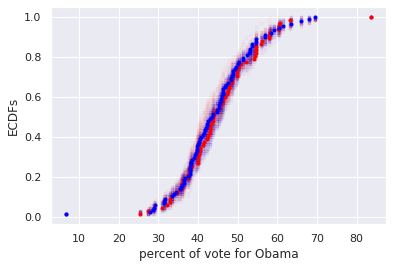

<Figure size 432x288 with 0 Axes>

In [ ]:
# permutate ulang 2 states dan plot it

for i in range(50):
  perm_sample_1, perm_sample_2 = permutation_sample(obama_votes_pa, obama_votes_oh)
  x_sample_pa, y_sample_pa = ecdf(perm_sample_1)
  x_sample_oh, y_sample_oh = ecdf(perm_sample_2)

  _ = plt.plot(x_sample_pa, y_sample_pa, marker='.',
               linestyle='none', color='red',  alpha=0.02)
  _ = plt.plot(x_sample_oh, y_sample_oh, marker='.',
               linestyle='none', color='blue', alpha=0.02)
      
# plot the origin data
x_pa, y_pa = ecdf(obama_votes_pa)
x_oh, y_oh = ecdf(obama_votes_oh)

_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none', color='red')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none', color='blue')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDFs')

plt.show()
plt.clf()


lihat pada plot grafik ecdf di atas bahwaasannya sample permutasi ECDF tumpang tindih dengan data yang diamati, berarti menunjukkan bahwa hipotesis sepadan dengan data, dan dua states tersebut terdistribusi secara identik. 

dan kalau semisal sample permutasi dengan data yang diamati tidak overlap maka hipotesis tidak sepadan dengan data dan tidak terdistribusi secara identik.

---
oke, lalu bagaimana dengan data yang  dinilai, dan bagaimana cara mengukur penilaian tersebut?

jawabannya bergantung pada **test statistic**

**Test statistic** ~ A single number that can be computed from observed data and from data you simulate under the null hypothesis. And it serves as a basis of comparison between the two.

if they are identical, they should have the same mean (so the difference in mean should be zero).

In [ ]:
# membuat permutation replicates
# permutation replicates ~ a single value of a statistic computed from a permutation sample

def draw_perm_reps(data_1, data_2, func, size=1):
  ''' Generate multiple permutation replicates '''

  # initialize array of replicates
  perm_replicates = np.empty(size)

  for i in range(size):
    # Generate permutation sample
    perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

    # compute the test statistic
    perm_replicates[i] = func(perm_sample_1, perm_sample_2)
  
  return perm_replicates

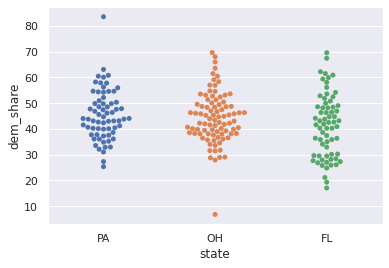

In [ ]:
# perlu juga untuk melihat EDA sebelum melakukan hypothesis testing
_ = sns.swarmplot(x='state', y='dem_share', data=swing_states)
plt.show()

nah kalau dilihat dari bee swarm plot diatas, terlihat PA dan OH terdistribusi sedikit serupa, tapi tak sama. karena terdapat 1 county dari PA memiliki persentase suara untuk Obma yang sangat tinggi, dan terdapat 2 county dengan persentase suara rendah, sedangkan OH terdapat 1. jadi bisa dilanjutkan dengan melakukank uji hipotesis

---
permutation test dan p_value

**p-value** ~ 

*   The probability of obtaining a value of your test statistic that is at least as etreme as what was obeserved, under the assumption the null hypothesis is true or a measure of the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

*   it is not the probability that the null hypothesis is true

In [ ]:
# the difference of means func

def diff_of_means(data_1, data_2):
  ''' Difference in means of two arrays '''

  diff = np.mean(data_1) - np.mean(data_2)

  return diff

In [ ]:
# compute difference of mean from origin data

empirical_diff_means = diff_of_means(obama_votes_pa, obama_votes_oh)
empirical_diff_means

1.1582360922659518

In [ ]:
# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(obama_votes_pa, obama_votes_oh,
                                 diff_of_means, size=10000)

In [ ]:
# compute p-value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.2324

it happened 23% of the time under the null hypothesis

when p-value is small, it is often said that the data are statistically significantly different than what we would observe under the null hypothesis. For this reason, the hypothesis testing we're doing is sometimes called null hypothesis significance testing, or NHST

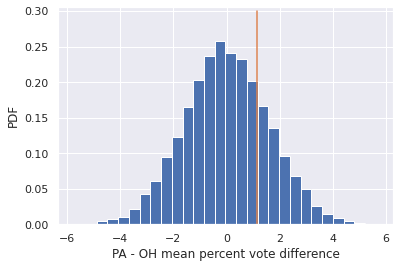

In [ ]:
_ = plt.hist(perm_replicates, bins=30, density=True)
_ = plt.plot([empirical_diff_means, empirical_diff_means],
             [0, 0.30])
_ = plt.xlabel('PA - OH mean percent vote difference')
_ = plt.ylabel('PDF')
plt.margins(.02)
plt.show()

daerah p-value sebelah kanan garis orange

---

**Pipeline for hypothesis testing**


*   Clearly state the null hypothesis
*   Dene your test statistic
*   Generate many sets of simulated data assuming the null
hypothesis is true
*   Compute the test statistic for each simulated data set
*   The p-value is the fraction of your simulated data sets for
which the test statistic is at least as extreme as for the real
data

---

**One sample test** ~ Compare one set of data to a single number


e.g  
misalnya kita memiliki data Michelson speed of light dengan mean tertentu, lalu pengukuran speed of light juga pernah dilakukan oleh Newcomb. tapi sayangnya kita tidak menumukan sebaran datanya, alih-alih kita hanya mengatahui mean-nya sebesar 299,860 km/s. kita pengen tahu gitu perbedaan fundamental antara pengukuran yang dilakukan Michelson dan Newcomb. Tapi ya itu kita tidak punya data set point dari Newcomb's measurement. Jadi pertanyaannya bisakah kita dari data set Michelson mendapatkan kumpulan data jika mean of speed of light yang sebenarnya dalam eksperiment si Michelson sama dengan Newcomb?

oke, rumusin dulu pernyataan hipotesisnya (Null hypothesis), kalau the mean speed of light sebenarnya pada eksperiment michelson adalah nilai yang dilaporkan Newcomb tadi.

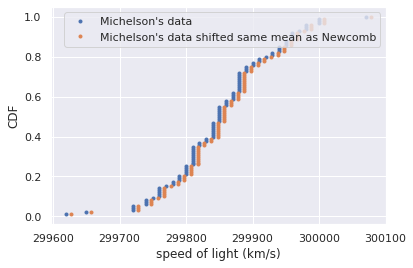

In [ ]:
# simulated in the true mean speed of light in michelson's experiment is Newcomb's value
# by shifting the Michelson data

newcomb_value = 299860  # km/s
speed_of_light_shifted = speed_of_light - np.mean(speed_of_light) + newcomb_value

# plot it into CDF

x_mich, y_mich = ecdf(speed_of_light)
x_shift, y_shift = ecdf(speed_of_light_shifted)

_ = plt.plot(x_mich, y_mich, marker='.', linestyle='none')
_ = plt.plot(x_shift, y_shift, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Michelson\'s data', 'Michelson\'s data shifted same mean as Newcomb'),
               loc='best')
plt.show()

karna ini ngebandingin kumpulan data dengan single value, jadi permutation test ga applicable

jadinya bootstraping aja pada shifted data untuk simulasi data dibawah the null hypothesis

In [ ]:
# calculating the test statistic same func as diff_of_mean fuction

def diff_from_newcomb(data, single_value=newcomb_value):
  return np.mean(data) - single_value

diff_obs = diff_from_newcomb(speed_of_light, newcomb_value)
diff_obs

-7.599999999976717

In [ ]:
# draw 10,000 bootstrap replicate

bs_replicates = draw_bs_replicates(speed_of_light_shifted, diff_from_newcomb, size=10000)

In [ ]:
# computing p-value

p = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p

0.1682

di atas kenapa less than karena the mean dari Michelson's experiment was less than Newcomb's value

dan ingat, diif_obs pada saat menghitung p value itu kalau pada case yang berbeda, tergantung test statistic yang dilakukan. apakah diff mean kah, mean kah dan lainnya, tergantung hipotesis

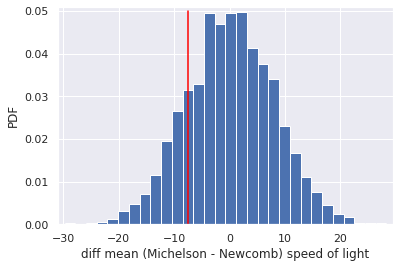

In [ ]:
# plot 

_ = plt.plot([diff_obs, diff_obs], [0, 0.05], color='red')
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('diff mean (Michelson - Newcomb) speed of light')
_ = plt.ylabel('PDF')
plt.margins(.02)
plt.show()

**two sample bootstrap hypothesis test** ~ compare two set of data

e.g

akan melakukan hypothesis test bahwa Pennsylvania dan Ohio memiliki mean percent of vote yang sama, tapi sebenarnya walaupun memiliki distribusi identik, dan sebenarnya di kasus ini menggunakan permutasi replicate, tapi ya coba aja wkwkwk

In [ ]:
# compute mean of all votes from two states
states_concat = np.concatenate((obama_votes_pa, obama_votes_oh))
mean_votes = np.mean(states_concat)

# empirical diff means
diff_mean_votes = np.mean(obama_votes_pa) - np.mean(obama_votes_oh)

In [ ]:
# generate shifted array
obama_votes_pa_shifted = obama_votes_pa - np.mean(obama_votes_pa) + mean_votes
obama_votes_oh_shifted = obama_votes_oh - np.mean(obama_votes_oh) + mean_votes

In [ ]:
# compute 10,000 bootstrap replicates
bs_replicates_pa = draw_bs_replicates(obama_votes_pa_shifted, np.mean, size=10000)
bs_replicates_oh = draw_bs_replicates(obama_votes_oh_shifted, np.mean, size=10000)

In [ ]:
# get replicates of difference of means
bs_replicates = bs_replicates_pa - bs_replicates_oh

# compute p-value
p = np.sum(bs_replicates >= diff_mean_votes) / len(bs_replicates)
p

0.2384

hahaha menarik p_value yang didapat sama-sama 23% walaupun data tiap state udah di translate :v

---

oke coba sekarang dari data set yang beda (frog_tongue.csv)

In [ ]:
frog_tongue = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/frog_tongue.csv',
                          skiprows=[x for x in range(14)])
frog_tongue.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [ ]:
# subsetting untuk 2 tipe frog
force_a = frog_tongue['impact force (mN)'][frog_tongue['ID']=='II']
force_b = frog_tongue['impact force (mN)'][frog_tongue['ID']=='IV']

In [ ]:
# convert millinewton to newton
force_a = force_a * 0.001
force_b = force_b * 0.001

In [ ]:
# Compute mean of all forces
forces_concat = np.concatenate((force_a, force_b))
mean_force = np.mean(forces_concat)

# Compute empirical diff mean
diff_mean_forces = np.mean(force_a) - np.mean(force_b)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_replicates(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_replicates(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute p-value
p = np.sum(bs_replicates >= diff_mean_forces) / len(bs_replicates)
p

0.0052

kemungkinan akan mendapatkan p-value yang sama kalau dulakukan tes permutasi. tapi hal yang penting adalah pertanyaan yang ingin ditanyakan. jadi pada frog impact force in apa yang ditanyakan? apakah tertarik pada gaya tumbukan rata-rata atau pada distribusi kekuatan tumbukan?

---

# Hypothesis test examples

**A/B testing** ~ used by organizations to see if strategy change gives a better result.

The null hypothesis is an A/B test is **the test statistics is imperious to the change**.

a low p-value implies that the change in strategy lead to a change in performance.

e.g on The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, evaluate the hypothesis that the party of a House member has no bearing on his or her vote. Use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. 

To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea

In [ ]:
# construct array of data
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

In [ ]:
# fraction of democrate voting in favor
def frac_yea_dems(dems, reps):
  """ compute fraction of Democrate yea votes """
  frac = np.sum(dems) / len(dems)
  return frac

In [ ]:
# acquire permutation samples
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

In [ ]:
# compute p-value
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
p

0.0001

This small p-value suggests that party identity had a lot to do with the voting.

---

anonther example

back to the nohitter dataset, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers.

in this case, we will perform an A/B test to determine if these rule changes resulted in a slower rate of no hitter (i.e., longer average time betweeen no-hitter) using difference in mena iter-no-hitter time as our test statistic.

In [ ]:
# import dataset
nohitter_times_live_dead = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/nohitter_live_dead.csv')

# subsetting dataset before and after
nht_live = nohitter_times_live_dead['nohitter times live']
nht_dead = nohitter_times_live_dead['nohitter times dead'][:90]

In [ ]:
# compute the observed difference in mean inter-no-hitter
nht_diff_obs = diff_of_means(nht_dead, nht_live)

In [ ]:
# acquire 10,000 permutatioin replicates of difference in mean no-hitter time
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)

In [ ]:
# compute p-value
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
p

0.0004

p-value is 0.0001, which means that only one out of 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001

That was a nice hypothesis test to check out whether the rule changes in 1920 changed the rate of no-hitters. But do EDA first, perhaps plotting the ECDFs of inter no-hitter times in the dead ball and live ball eras.

---

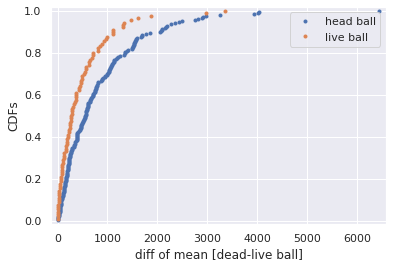

In [ ]:
# ecdfs
x_live, y_live = ecdf(nht_live)
x_dead, y_dead = ecdf(nht_dead)

_ = plt.plot(x_live, y_live, marker='.', linestyle='none')
_ = plt.plot(x_dead, y_dead, marker='.', linestyle='none')
_ = plt.xlabel('diff of mean [dead-live ball]')
_ = plt.ylabel('CDFs')
plt.margins(.02)
_ = plt.legend(("head ball", "live ball"))
plt.show()

---
Test of correlation



case :

kita akan menghitung pearson correlation coefficient antara suara untuk obama dan jumlah total suara keseluruhan. Pearson correlation coefficient itu menghitung berapa banyak variabilitas karena mereka berkorelasi. it ranges from -1 for totally negatively correlated to 1 fo positively corelated

In [ ]:
np.corrcoef(total_votes, obama_votes)

array([[1.        , 0.53619736],
       [0.53619736, 1.        ]])

coefficient correlation nya 0.54, mengindikasikan bahwa data tidak berkorelasi sempurna, tapi are coerlated nonetheless, i.e tetap berkorelasi.

tapi masalahnya bagaimana kita bisa pasti apakah korelasi ini nyata, atau jika it bisa terjadi secara kebetulan?

kita bisa melakukan hypothesis test.
oke, kita mengandaikan a null hypothesis bahwa tidak ada korelasi antara dua variable tadi. lalu kita simulasikan the election dengan asumsi the hypothesis is true. Dan menggunakan pearson correlation coefficient sebagain the test statistic.

---

sama halnya dengan case the observed correlation between female illiteracy and fertility may just be by chance. the fertility of a given country may actually be totally independent of its illiteracy (that's our hypothesis).

to do so, permute the illiteracy values fixed. this simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of our permutation replicates have a Pearson correlation coefficient greather than the ovserved one

nah cara in lebih eficient dari pada permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data). Because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

In [ ]:
# compute the Pearson correlation coefficient between 2 arrays
def pearson_r(x, y):
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]   # or [1, 0]

In [ ]:
# compute observed correlation 
r_obs = pearson_r(illiteracy, fertility)

In [ ]:
# inititalize permutation replicate
perm_replicates = np.empty(1000000)

# draw replicates
for i in range(1000000):
  # permute illiteracy measurements
  illiteracy_permuted = np.random.permutation(illiteracy)

  # compute pearson correlation
  perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

In [ ]:
# compute p-value
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
p

0.0

kita dapet p-value 0. Ini berarti p-value sangat rendah, karena tidak pernah mendapatkan satu pun replicate in 10.000 yang di draw dan memiliki pearson correlatin yang lebih besar dari pada yang diamati. We could try increasing the number of replicates we take to continue to move the upper bound on our p-value lower and lower.

---

Do neonicotinoid insecticides have unintended consequences?

we will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated)

In [ ]:
# import dataset
bee_sperm = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/bee_sperm.csv',
                        skiprows=[x for x in range(3)])
bee_sperm.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [ ]:
# subsetting sperma hidup yang untreated dan treated
control = bee_sperm['Alive Sperm Millions'][bee_sperm['Treatment']=='Control']
treated = bee_sperm['Alive Sperm Millions'][bee_sperm['Treatment']=='Pesticide']

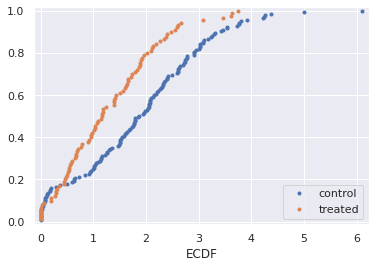

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot ecdf
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)
_ = plt.plot(x_control, y_control, marker='.', linestyle='none')
_ = plt.plot(x_treated, y_treated, marker='.', linestyle='none')
_ = plt.xlabel('milions of alive sperm per mL')
_ = plt.xlabel('ECDF')
_ = plt.legend(('control', 'treated'), loc='lower right')
plt.margins(.02)
plt.show()
plt.clf()

ECDF menunjukan dengan jelas perbedaan antara treated dan untreated. Terlihat lebah yang dirawat memiliki lebih sedikit sperma hidup.

bootstrap hypothesis on bee sperm counts

trus, uji hipotesis: rata-rata, male bees treated dengan insektisida neonicotinoid memiliki jumlah yang sama dibandingkan dengan untreated male bees. trus, ini akan menggunakan the difference of means as test statistic 

In [ ]:
# compute the difference in mean sperm count
diff_means = diff_of_means(control, treated)

In [ ]:
# compute mean of pooled data
mean_count = np.mean(np.concatenate((control, treated)))

# generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

In [ ]:
# generate bootstrap replicates
bs_reps_control = draw_bs_replicates(control_shifted,
                                     np.mean,
                                     size=10000)
bs_reps_treated = draw_bs_replicates(treated_shifted,
                                     np.mean,
                                     size=10000)

In [ ]:
# get replicates of difference of means
bs_replicates = bs_reps_control - bs_reps_treated

In [ ]:
# compute p-value
p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
p

0.0

p-value kecil, bahkan kemungkinan kurang dari 0.0001

---

# Putting it all together: a case study

our well-equipped toolbox


*   Graphical and quantitative EDA
*   Parameter estimation
*   Confidance interval calculation
*   Hypothesis testing



---

we will do Grant's measurements fo beak length and beak depth. we will consider different aspects of the beak geometry, including how it varies over time, from species to species, and from parent of offspring.

---
for our first anaysis, you will investigate how the beak depth of Geospiaza scandens has changed over time. we will start with :


*   EDA of beak depths in 1975 and 2012
*   perrom a parameter estimation, with confidence intervals, of mean beak depth for those respective years
*   do a hypothesis test investigating if the mean beak depth has changed from 1975 to 2012 (i.e did the beaks get deeper?)



---
beak depths of Darwin's finches has changed over time
*   species Geospiza scandens
*   also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time

In [ ]:
# import datasets
df_1975 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/finch_beaks_1975.csv')
df_2012 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Datasets/finch_beaks_2012.csv')

In [ ]:
# the beak depth scandens over time
bd_1975 = df_1975['Beak depth, mm'][df_1975['species']=='scandens']
bd_2012 = df_2012['bdepth'][df_2012['species']=='scandens']

# concate both of time
bd_scandens = {'year' : [1975 if i < len(bd_1975) else 2012 for i in range(len(bd_1975)+len(bd_2012))],
               'beak_depth' : np.concatenate((bd_1975, bd_2012))}

# convert to data frame
bd_scandens = pd.DataFrame(bd_scandens)

**EDA** of beak depths of the finch species Geospiza scandens

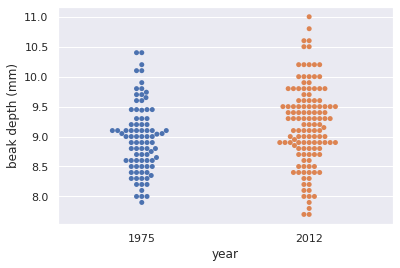

In [ ]:
# bee swarm plot

_ = sns.swarmplot(x='year', y='beak_depth', data=bd_scandens)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
plt.show()

it appears as though the mean dari tahun 2012 itu sedikit lebih tinggi, dan variance nya lebih besar.

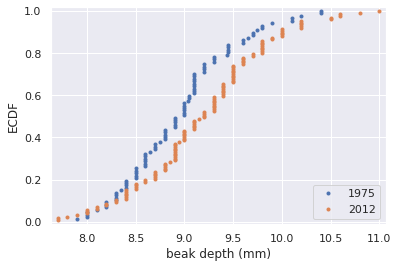

In [ ]:
# the ECDF

x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show()

nah ini lebih jelas dilihat dengan ecdf, kalau mean-nya lebih besar pada 2012, dan variance-nya juga.

---

**Parameter estimates of beak depth**

estimasikan perbedaan dari mean beak depth dari scandens samples dari 1975 dan 2012, dan report a 95% confidance interval

In [ ]:
# compute the difference of mean observed
mean_diff = diff_of_means(bd_2012, bd_1975)

In [ ]:
# get bootstrap replicates dari means
bs_replicates_1975 = draw_bs_replicates(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_replicates(bd_2012, np.mean, size=10000)
                                      

In [ ]:
# compute samples of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

In [ ]:
# compute 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

In [ ]:
print(f'difference of means : {mean_diff} mm')
print(f'95% confidence interval : {conf_int} mm')

difference of means : 0.2262204724409429 mm
95% confidence interval : [0.06224405 0.39327941] mm


**Hypothesis test**, are beaks depper in 2012?

nah plot ecdf dan confidence interval tadi sebenarnya itu udah memperjelas kalau beak dari scandens have gotten deeper. tapi mungkinkah efek ini hanya kebetulan saja? dengan kata lain, berapa porobabilitas bahwa kita akan mendapatkan perbedaan in mean beak depth yang diamati jika mean-nya sama?

the hypotesting yang akan diuji ini bukalah bahwa the beak depths berasal dari distribusi yang sama. Tapi the hypothesis is thet the means are equal. Makanya ini tidak menggunakan permutation test, tapi menggunakan bootstrap sample dari data yang sudah shifted.

In [ ]:
# samakan dulu meannya

# computed mean combined dataset
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

In [ ]:
# get bootstrap replicates of shifted data
bs_replicates_1975 = draw_bs_replicates(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_replicates(bd_2012_shifted, np.mean, size=10000)

In [ ]:
# compute replicate of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

In [ ]:
# compute p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.0042

nah karena p-value nya 0.0038 ini kecil, ini menunjukkan bahwa there is a statistical significant difference. Tapi yang lebih penting itu mengetahui betapa berbedanya mereka. Kan sebelumnya didapat 0.2 mm antar mean. ini yang harus dikaitkan dengan signifikansi statistik. berubah 0.2 dalam 37 tahun(2012-1975) sangat substansial by evolutionary standars. jika terus berubah pada kecepatan yang sama, the beak depth akan berlipat ganda dalam 400 tahun

---

**EDA of beak length and depth**

In [ ]:
# susetting beak length from 1975 and 2012
bl_1975 = df_1975['Beak length, mm'][df_1975['species']=='scandens']
bl_2012 = df_2012['blength'][df_2012['species']=='scandens']

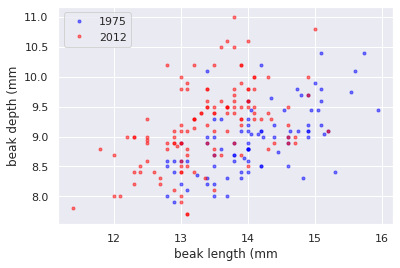

In [ ]:
# make scatter plots of 1975 and 2012 data

_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none',
             color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none',
             color='red', alpha=0.5)

_ = plt.xlabel('beak length (mm')
_ = plt.ylabel('beak depth (mm')
_ = plt.legend(('1975', '2012'), loc='upper left')

plt.show()

kalau dilihat that beaks became shorter and depper

---

Perform a **linear regression** for both them and pairs bootstrap estimates for the regression parameters. Perform 95% confidence interval on the slope and intercept of the regression line

In [ ]:
# compute the linear regression
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

In [ ]:
# perform pairs bootstrap fo the linear regression
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pair_linreg(np.array(bl_1975),
                                                                 np.array(bd_1975),
                                                                 size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pair_linreg(np.array(bl_2012),
                                                                 np.array(bd_2012),
                                                                 size=1000)

In [ ]:
# compute the confidence intervals of slopes and intercept

slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

In [ ]:
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.32747781 0.59843284]
1975: intercept = 2.3908752365842263 conf int = [0.5457105 4.3344776]
2012: slope = 0.462630358835313 conf int = [0.34333843 0.59670815]
2012: intercept = 2.9772474982360198 conf int = [1.20126462 4.58166332]


bisa dilihat, sepertinya memiliki slope(kemiringan) yang sama tapi intercept(perpotongan) yang berbeda


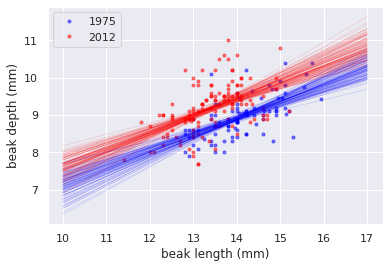

In [ ]:
# display the linear regression result dengan 100 sample over time

# make scatter plot
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# generate x value for bootstrap lines (strat from min value to max value)
x = np.array([10, 17])

# plot the bootstrap lines
for i in range(100):
  y_1975 = bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i]
  _ = plt.plot(x, y_1975, linewidth=0.5, alpha=0.2, color='blue')

  y_2012 = bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i]
  _ = plt.plot(x, y_2012, linewidth=0.5, alpha=0.2, color='red')

plt.show()

nah dari linear regrssion memberikan informasi the beak geometry, the slope yang sama pada tahun 1975 dan 2012 menunjukkan bahwa untuk setiap milimeter yang diperoleh pada beak length, the beak depth bertambah sekitar setengah milimeter dalam dua tahun tersebut.

---

nah kalau tertarik pada the shape of the beak, bisa dibandingkan rasio beak length dengan beak depth.

In [ ]:
# compute length to depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

In [ ]:
# generate bootstarp replicates of the means
bs_ratio_replicates_1975 = draw_bs_replicates(ratio_1975, np.mean, size=10000) 
bs_ratio_replicates_2012 = draw_bs_replicates(ratio_2012, np.mean, size=10000) 

In [ ]:
# compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_ratio_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_ratio_replicates_2012, [0.5, 99.5])

In [ ]:
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55724331 1.60110403]
2012: mean ratio = 1.4658342276847778 conf int = [1.44534578 1.48723473]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

---